In [1]:
# Base
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import plotly.express as px

#Preprocess
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, ConfusionMatrixDisplay


# Validation and searching utils
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Deep learning
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten, Dense, MaxPooling2D,BatchNormalization,Dropout
import tensorflow as tf

2023-07-19 21:50:14.013945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Seleccionando un modelo:

La selección de un modelo adecuado es un paso crucial en el proceso de desarrollo de un sistema de aprendizaje automático, ya que afecta directamente el rendimiento y la utilidad del modelo en la resolución del problema en cuestión. Al seleccionar un modelo, se deben considerar varios factores importantes que pueden variar según la naturaleza del problema y los requisitos específicos de la aplicación. Entre los aspectos fundamentales a tener en cuenta se encuentran:

1. **Precisión**: La precisión del modelo es esencial y generalmente se evalúa utilizando métricas de rendimiento como la exactitud (accuracy), la precisión, el recall o el F1-score. La elección del modelo debe estar guiada por su capacidad para proporcionar una alta precisión en la tarea específica que se desea resolver.

2. **Interpretabilidad**: En algunos casos, la interpretación y explicación del modelo pueden ser igualmente importantes que su precisión. Los modelos interpretables permiten entender cómo se toman las decisiones y qué características influyen más en la predicción, lo que es valioso en aplicaciones críticas y en contextos donde se requiere transparencia y confianza en el proceso de toma de decisiones.

3. **Naturaleza del problema**: La elección del modelo debe estar en consonancia con la naturaleza del problema que se desea resolver. Por ejemplo, si se trata de un problema de clasificación con múltiples clases, es posible que se requiera un modelo de clasificación multiclase, mientras que para problemas de regresión, se necesitará un modelo que pueda predecir valores numéricos.

4. **Naturaleza del modelo**: Los diferentes algoritmos y arquitecturas de modelos tienen sus ventajas y desventajas, y es fundamental considerar cómo el modelo realiza las predicciones. Algunos modelos están diseñados para proporcionar una mera clasificación, donde asignan una etiqueta o categoría específica a cada instancia de entrada. Estos modelos son adecuados para problemas donde se busca una decisión clara y categórica, como la clasificación de imágenes en diferentes categorías.
    Por otro lado, hay modelos que tienen la capacidad de proporcionar probabilidades en lugar de una simple clasificación. Estos modelos calculan la probabilidad de que una instancia pertenezca a cada clase, lo que permite una mayor flexibilidad en la toma de decisiones. La estimación de probabilidades es valiosa en situaciones donde se requiere un enfoque más ponderado y una mayor incertidumbre en la predicción.



5. **Velocidad del modelo**: La velocidad de inferencia del modelo puede ser un factor crítico en aplicaciones en tiempo real o en sistemas con limitaciones de recursos. Algunos modelos son más ligeros computacionalmente y permiten una inferencia más rápida, mientras que otros pueden ser más complejos y requieren más tiempo de procesamiento.




# Machine learning

## Entendiendo el problema

El cáncer de seno es una enfermedad prevalente y preocupante en todo el mundo, afectando principalmente a las mujeres, pero también a algunos hombres. La detección temprana y precisa del cáncer de seno es crucial para un tratamiento efectivo y mejores resultados de supervivencia. En este sentido, la construcción de características a partir de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas en el seno se ha convertido en una herramienta prometedora para la clasificación de este tipo de cáncer.

Las imágenes FNA proporcionan una valiosa información visual sobre las células presentes en la muestra, y a partir de estas imágenes se pueden extraer características cuantitativas y descriptivas que describen las propiedades de los núcleos celulares. Estas características incluyen el tamaño, la forma, la textura y otras propiedades que pueden ser relevantes para la detección y clasificación del cáncer de seno.

La construcción de características a partir de imágenes FNA permite llevar a cabo un análisis objetivo y sistemático de las células presentes en la muestra, evitando la subjetividad inherente a la interpretación visual. Al aplicar algoritmos y técnicas de aprendizaje automático a estas características, es posible desarrollar modelos de clasificación que puedan distinguir entre células sanas y células cancerosas con una alta precisión.

El objetivo de este estudio es utilizar las características construidas a partir de imágenes FNA de masas en el seno para desarrollar un modelo de clasificación de cáncer de seno. Este modelo tiene como finalidad ayudar en la detección temprana y precisa de esta enfermedad, mejorando así las tasas de supervivencia y facilitando la toma de decisiones clínicas.

In [3]:
df = pd.read_csv('Data/Mini_data.csv').drop('Unnamed: 0',axis=1)

In [4]:
df.head()

diagnosis  concave points_mean  radius_worst  perimeter_worst  \
0          1              0.14710         25.38           184.60   
1          1              0.07017         24.99           158.80   
2          1              0.12790         23.57           152.50   
3          1              0.10520         14.91            98.87   
4          1              0.10430         22.54           152.20   

   concave points_worst  texture_mean  area_worst  smoothness_worst  
0                0.2654         10.38      2019.0            0.1622  
1                0.1860         17.77      1956.0            0.1238  
2                0.2430         21.25      1709.0            0.1444  
3                0.2575         20.38       567.7            0.2098  
4                0.1625         14.34      1575.0            0.1374

In [5]:
#profile = ProfileReport(df, title="Breast Cancer Profiling Report")

In [ ]:
#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# profile.to_file('report.html')

Text(0.5, 0.98, 'Marginal plot and distributions')

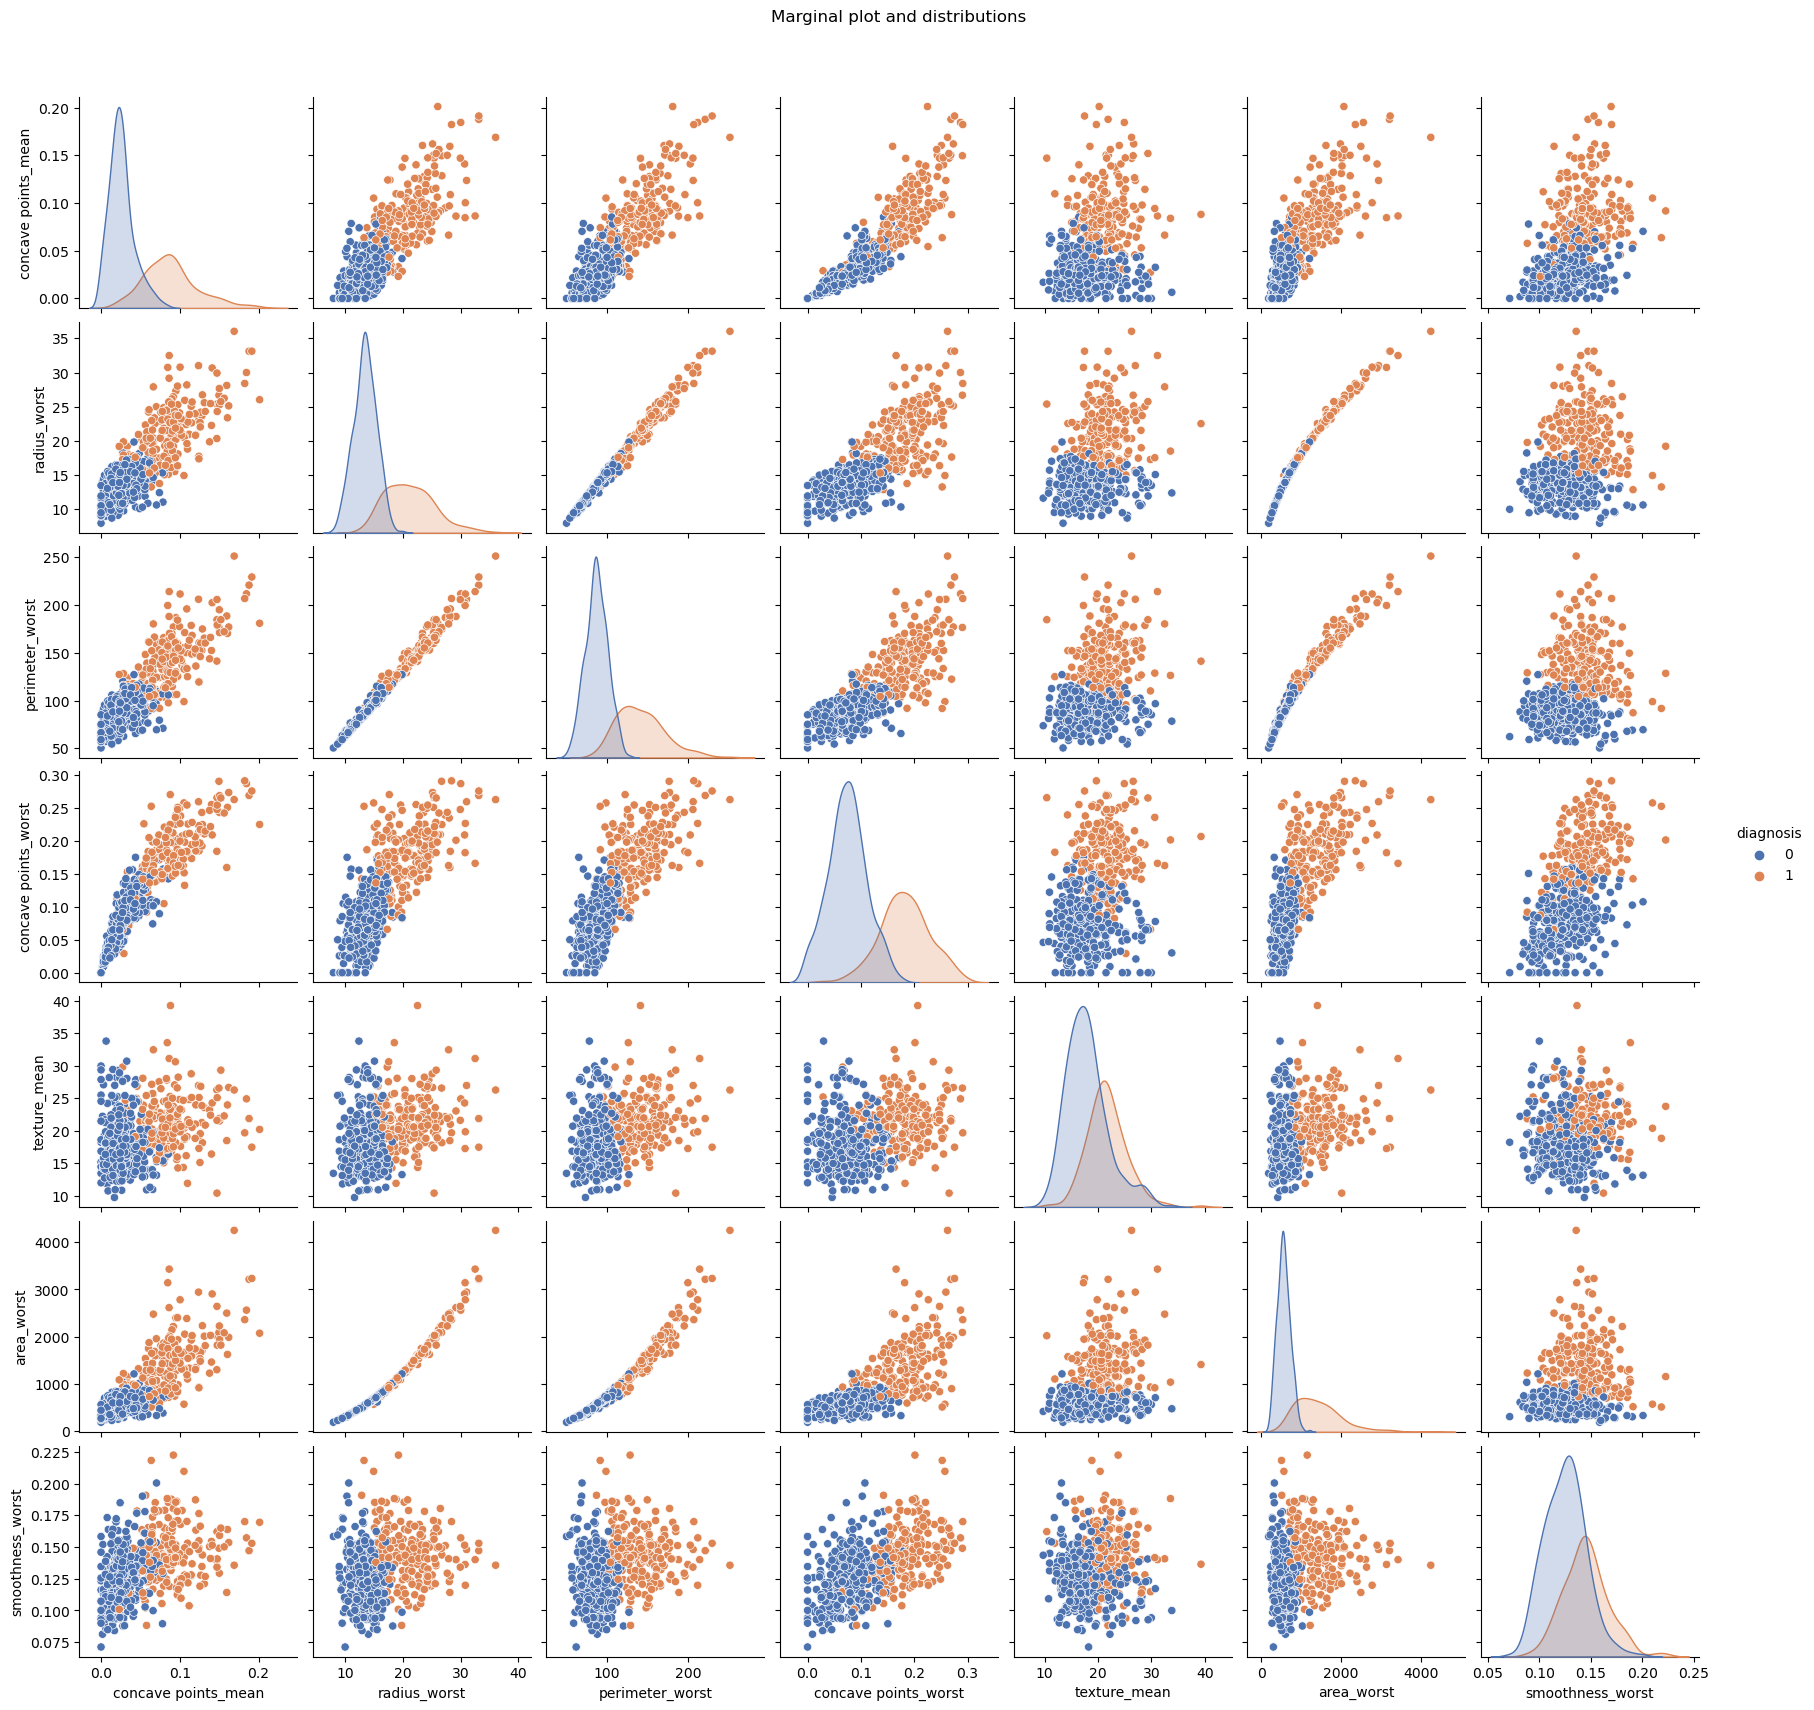

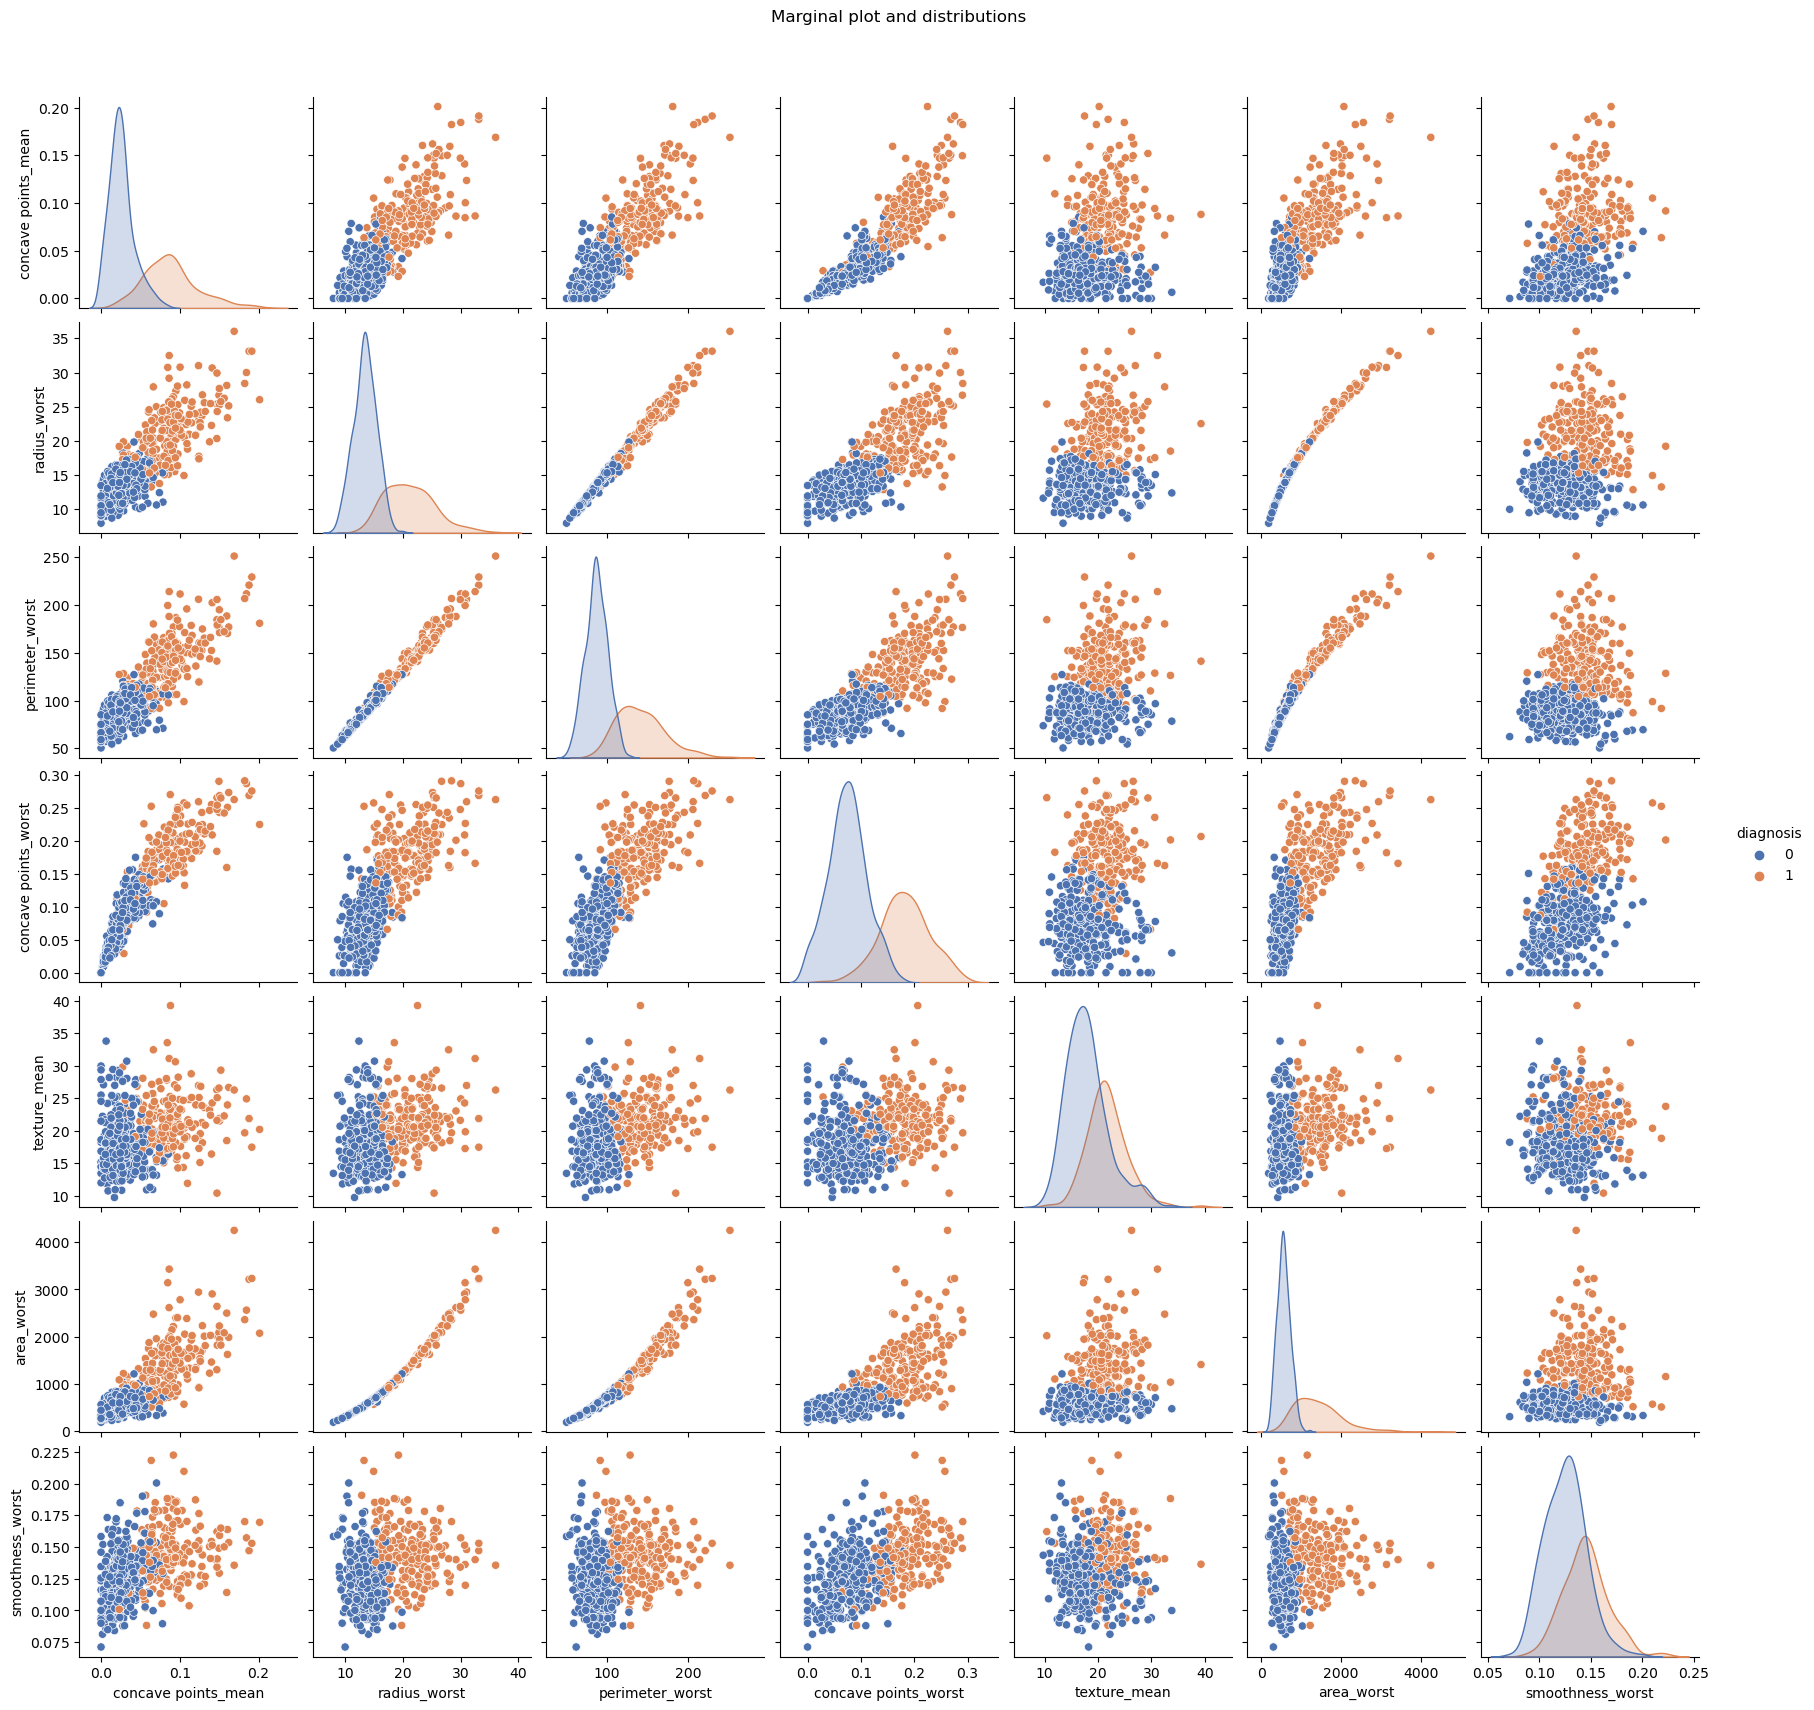

In [10]:
# Visualizing data
%matplotlib inline
pair=sns.pairplot(df, hue="diagnosis",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

In [8]:
custom_colors = ['#FF0000', '#00FF00'] 
fig = px.scatter_3d(df, x='texture_mean', y='area_worst', z='smoothness_worst',
              color='diagnosis',color_discrete_sequence=custom_colors)
fig.show()

## Separando los datos:

In [22]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [23]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Support vector Machine

Pros:


* Es eficiente en espacios de alta dimensionalidad y es adecuado para problemas con un gran número de características.
* Proporciona una clasificación clara y directa, lo que lo hace interpretable y fácil de entender.
* Bastante robusto a nivel de aprendizaje, buen desempeño con nuevos datos.

Contras:
* Si el problema tiene una alta complejidad , una SVM puede ser insuficiente.

### Creando la SVM

In [24]:
# Seleccionamos los mejores hiperparametros

hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


model = SVC()

# Create the GridSearchCV object with the model and hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit the model using GridSearchCV and perform cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [25]:
# Get the best found hyperparameters
best_params = grid_search.best_params_

#  Create a new model with the best hyperparameters
svm = SVC(**best_params)

# Compute the cross-validation scores using the best model
cross_val_scores = cross_val_score(svm, X_train, y_train, cv=5)

# Print the average cross-validation score
print("Average cross-validation score:", cross_val_scores.mean())

#  Train the model using all data and the best hyperparameters
svm.fit(X_train, y_train)

Average cross-validation score: 0.947259742276044


SVC(C=10, gamma=0.1, kernel='linear')

In [27]:
svm.score(X_test,y_test)

0.9736842105263158

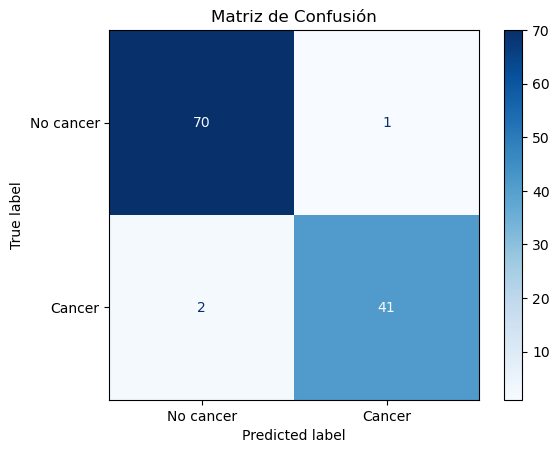

In [36]:
# Realiza las predicciones con el modelo SVM
y_pred = svm.predict(X_test)

# Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases 
class_names = ['No cancer', 'Cancer']

#Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Grafica la matriz de confusión
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Matriz de Confusión')
plt.show()

### Interpretando el modelo

In [67]:
coef=svm.coef_
columns= list(df.columns[1::])

for i in range(len(columns)) :
    print(columns[i] +' '+ str(coef[0][i]) )

concave points_mean 6.039530252361761
radius_worst 0.5658945594449278
perimeter_worst 0.07431174462180934
concave points_worst 12.746062029956558
texture_mean 0.3844189451052955
area_worst 0.003312099550385028
smoothness_worst 8.335645976549383


<BarContainer object of 7 artists>

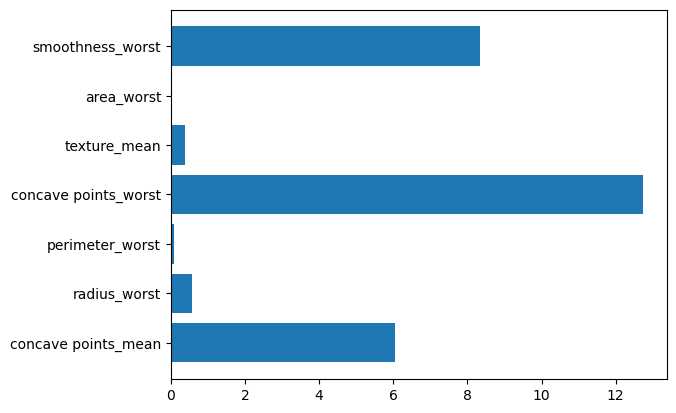

In [68]:
plt.barh(columns, coef[0])

## Regresión logística


Pros:

* La regresión logística es un modelo simple y rápido que es eficiente y adecuado para problemas de clasificación binaria.
* Proporciona probabilidades como resultado natural, lo que permite una estimación directa de la confianza en las predicciones.
* Es altamente interpretable, lo que significa que se puede entender fácilmente cómo las características afectan la probabilidad de pertenecer a una clase u otra.
* Es menos propenso a sobreajuste en comparación con modelos más complejos.

Contras:

* Si el problema tiene una alta complejidad , una Regresión logística puede ser insuficiente.

In [37]:
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] ,
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


model = LogisticRegression()

# Create the GridSearchCV object with the model and hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit the model using GridSearchCV and perform cross-validation
grid_search.fit(X_train, y_train)

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/env

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/env

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/silverwolf/anaconda3/envs/DeepLearning/lib

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [38]:
# Get the best found hyperparameters
best_params = grid_search.best_params_

#  Create a new model with the best hyperparameters
Lg = LogisticRegression(**best_params)

#  Compute the cross-validation scores using the best model
cross_val_scores = cross_val_score(Lg, X_train, y_train, cv=5)

#  Print the average cross-validation score
print("Average cross-validation score:", cross_val_scores.mean())

#  Train the model using all data and the best hyperparameters
Lg.fit(X, y)

Average cross-validation score: 0.9626373626373625


LogisticRegression(C=10000, solver='liblinear')

In [39]:
Lg.score(X_test,y_test)

0.9736842105263158

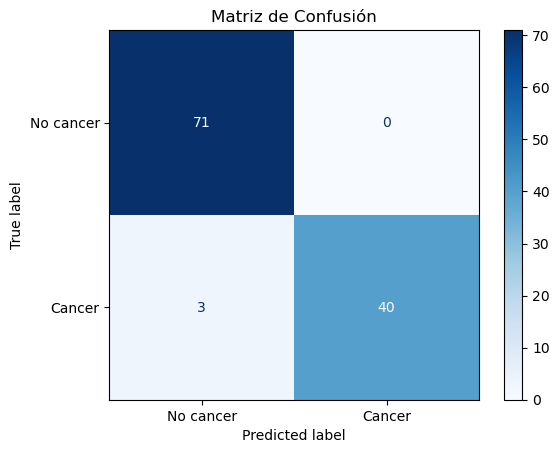

In [40]:
# Realiza las predicciones con el modelo SVM
y_pred = Lg.predict(X_test)

# Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases 
class_names = ['No cancer', 'Cancer']

#Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Grafica la matriz de confusión
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Matriz de Confusión')
plt.show()

### Interpretando el modelo

In [59]:
coef=Lg.coef_
columns= list(df.columns[1::])

for i in range(len(columns)) :
    print(columns[i] +' '+ str(coef[0][i]) )

concave points_mean 14.855141621941403
radius_worst -1.3881184205312067
perimeter_worst -0.021473368550567792
concave points_worst 32.38344604161236
texture_mean 0.30695310744010584
area_worst 0.02594592221078347
smoothness_worst 19.21286532728543


<BarContainer object of 7 artists>

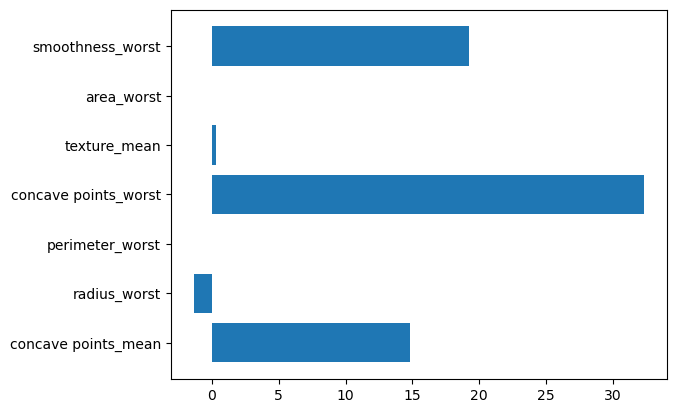

In [66]:
plt.barh(columns, coef[0])

# Deep learning

El cáncer de seno es una de las principales causas de muerte entre las mujeres en todo el mundo. La detección temprana ayuda a reducir el número de muertes prematuras. Los datos analizan las imágenes médicas de cáncer de seno utilizando ecografía. El conjunto de datos de ecografía de seno se clasifica en tres clases: imágenes normales, benignas y malignas. Las imágenes de ecografía de seno pueden producir excelentes resultados en la clasificación, detección y segmentación del cáncer de seno cuando se combinan con el aprendizaje automático.

Datos
Los datos recopilados en el estudio incluyen imágenes de ecografía de seno en mujeres de entre 25 y 75 años. Estos datos se recopilaron en 2018 y el número total de pacientes es de 600 mujeres. El conjunto de datos consta de 780 imágenes con un tamaño promedio de imagen de 500*500 píxeles. Las imágenes están en formato PNG. Las imágenes de referencia se presentan junto con las imágenes originales. Las imágenes se clasifican en tres clases: normal, benigna y maligna.

Si utilizas este conjunto de datos, por favor cita:
Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.


**Redes Neuronales Convolucionales (CNN)**:

Pros:

* Las CNN son altamente efectivas para el procesamiento de imágenes y tareas de visión por computadora, especialmente cuando se trabaja con datos de alta dimensionalidad, como imágenes en formato 2D o 3D.
* Pueden aprender representaciones jerárquicas de las características, lo que las hace eficientes para extraer patrones complejos y sutiles de las imágenes.
* Al utilizar capas convolucionales y de pooling, las CNN pueden reducir la dimensionalidad de las imágenes, lo que ayuda a manejar conjuntos de datos más grandes y mejora la eficiencia computacional.
* Son capaces de aprender características espaciales, lo que las hace adecuadas para problemas en los que la ubicación de las características en la imagen es relevante.

Contras:

* La interpretación de las decisiones tomadas por las CNN puede ser más complicada que con modelos más simples, ya que las representaciones aprendidas son más abstractas y menos interpretables.
* El entrenamiento de CNN puede ser computacionalmente intensivo y requerir hardware con alta capacidad de procesamiento gráfico (GPU) para acelerar el proceso de entrenamiento.
* Las CNN pueden ser propensas al sobreajuste, especialmente si no se utilizan técnicas adecuadas de regularización y validación cruzada.

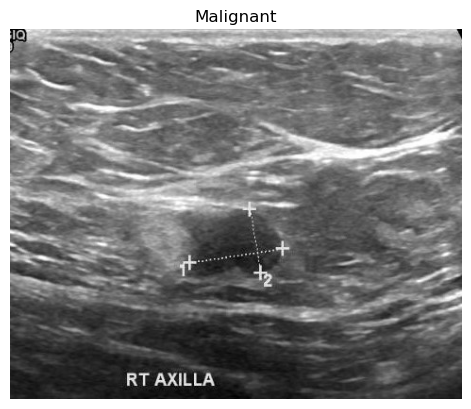

In [2]:
directory='Data/images/Dataset_BUSI_with_GT/'
label_list=['benign','normal','malignant']
images,labels=get_images((256,256),directory,label_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

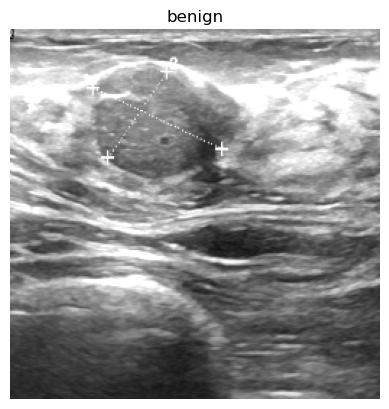

In [3]:
plt.imshow(images[51])
plt.title(label_list[labels[51]])
plt.axis('off')

### Separando los datos

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Construyendo la arquitectura de la red neuronal

In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [6]:
# Clear any logs from previous runs
!rm -rf ./logs/

/bin/bash: /home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1,
                                                     write_graph=True)


In [8]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    #BatchNormalization(),
    #Dropout(0.2),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(3,activation='softmax')
])

2023-07-19 21:53:34.765143: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 3)                 1548387   
                                                                 
Total params: 1,549,283
Trainable params: 1,549,283
Non-trainable params: 0
_________________________________________________________________


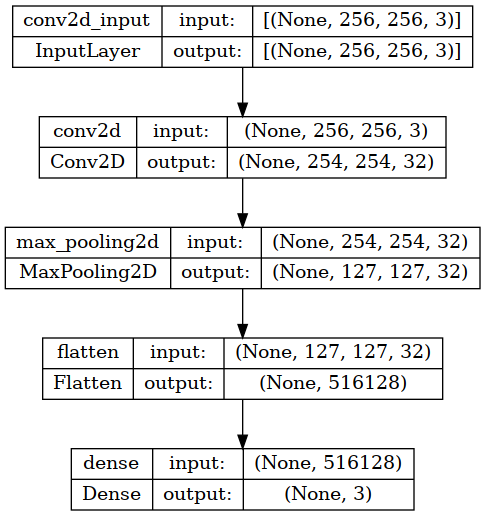

In [10]:
tf.keras.utils.plot_model(model,'mulit_input_output_model.png',show_shapes=True)

In [11]:
optimizer=tf.keras.optimizers.Adam()

In [12]:
model.compile(optimizer=optimizer,
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,
                  batch_size=64,
                  epochs=15,
                  validation_split=0.3,
                 callbacks=[tensorboard_callback])

Epoch 1/15
7/7 [==============================] - 64s 7s/step - loss: 15.7486 - accuracy: 0.3945 - val_loss: 8.4104 - val_accuracy: 0.5372
Epoch 2/15
7/7 [==============================] - 19s 3s/step - loss: 4.7465 - accuracy: 0.4748 - val_loss: 2.7870 - val_accuracy: 0.4468
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 1.9962 - accuracy: 0.5413 - val_loss: 1.3882 - val_accuracy: 0.5426
Epoch 4/15
7/7 [==============================] - 10s 2s/step - loss: 0.8804 - accuracy: 0.6376 - val_loss: 0.8558 - val_accuracy: 0.6543
Epoch 5/15
7/7 [==============================] - 10s 1s/step - loss: 0.6218 - accuracy: 0.7959 - val_loss: 0.8125 - val_accuracy: 0.6383
Epoch 6/15
7/7 [==============================] - 11s 2s/step - loss: 0.4289 - accuracy: 0.8417 - val_loss: 0.7228 - val_accuracy: 0.7021
Epoch 7/15
7/7 [==============================] - 10s 2s/step - loss: 0.2863 - accuracy: 0.9335 - val_loss: 0.7617 - val_accuracy: 0.7234
Epoch 8/15
7/7 [=================

%tensorboard --logdir logs/fit

In [14]:
!tensorboard --logdir logs/fit

/bin/bash: /home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-07-19 21:58:12.692049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [24]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = tf.argmax(y_pred, axis=1)



5/5 [==============================] - 1s 192ms/step


In [23]:
np.argmax(y_pred)

183

In [25]:
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_class)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(26, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


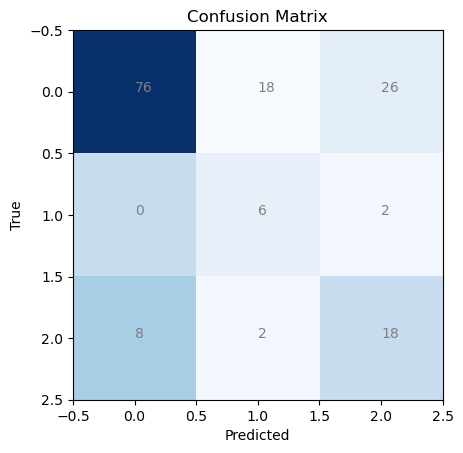

In [44]:
# Plot the confusion matrix
plt.imshow(confusion_matrix, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Annotate the confusion matrix
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        print(str(confusion_matrix[i][j]))
        plt.annotate(str(np.array(confusion_matrix[i][j])), (i, j), color='grey')

plt.show()


In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss: ', loss)
print('Accuracy: ', accuracy)

5/5 [==============================] - 1s 195ms/step - loss: 1.1214 - accuracy: 0.6410
Loss:  1.1213773488998413
Accuracy:  0.6410256624221802


In [49]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')


/bin/bash: /home/silverwolf/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets
